# Code to scrape from Reddit, from 1/1/2015 onward

In [90]:
%matplotlib inline

From [here](https://www.reddit.com/r/learnpython/comments/574pn5/anyone_have_a_reddit_scraper/):

Better, use [PRAW](https://praw.readthedocs.io/en/latest/), The Python Reddit API Wrapper.

Application name: ukx602qFQogMHQ
secret code: 	Rx4IQfhAZ7kkAcrOIGLlIEwaHmw

From the [Quck start guide](https://praw.readthedocs.io/en/latest/getting_started/quick_start.html), here's the sample code.

In [5]:
import praw

reddit = praw.Reddit(client_id='ukx602qFQogMHQ',
                         client_secret='Rx4IQfhAZ7kkAcrOIGLlIEwaHmw',
                         user_agent='ubuntu:CommunityEngagement:v.1.0.0 (by /u/pterosauroid)')

for submission in reddit.subreddit('learnpython').hot(limit=3):
    print(submission.title)

Ask Anything Monday - Weekly Thread
Can't figure out how to run modules or open the editor with Python 3.6 IDLE
What would you call working with data frames?


In the future, put the user info into a praw.ini file, as described [here](https://praw.readthedocs.io/en/latest/getting_started/configuration/prawini.html).  Now, start getting info from depression subreddit.

In [6]:
# assume you have a Reddit instance bound to variable `reddit`
subreddit = reddit.subreddit('depression')

print(subreddit.display_name)  # Output: redditdev
print(subreddit.title)         # Output: reddit Development
print(subreddit.description[:500], '...')   # Output: A subreddit for discussion of ...

depression
/r/depression, because nobody should be alone in a dark place
##A supportive space for anyone struggling with depression. 

**********
FYI, it's usually more helpful to post anything that specifically involves suicidal thoughts or intent in /r/SuicideWatch.     

If you're concerned about someone else's suicide risk, see their [talking tips](http://redd.it/igh87) and [risk assessment guide](http://redd.it/1c7nqf).
********

Please review and follow our rules.

1. **Text Posts** ***only***.  
    * Articles (including personal blogs) and media must be linke ...


[This blog post](https://unsupervisedlearning.wordpress.com/2012/09/26/who-is-rwashingtondc-part-1-daily-activity-usage/) has some good code for scraping all submissions to a subreddit.  it iterates over users, however, not over submissions.  

Look at what a submission looks like.

In [12]:
# assume you have a Subreddit instance bound to variable `subreddit`
for submission in subreddit.new(limit=2):
    print(submission.title)  # Output: the submission's title
    print(submission.score)  # Output: the submission's score
    print(submission.id)     # Output: the submission's ID
    print(submission.url)    # Output: the URL the submission points to
                             # or the submission's URL if it's a self post

I see nothing in carrying out this life
1
6zic2i
https://www.reddit.com/r/depression/comments/6zic2i/i_see_nothing_in_carrying_out_this_life/
Fetish about death
2
6zib03
https://www.reddit.com/r/depression/comments/6zib03/fetish_about_death/


In [22]:
import pprint
pprint.pprint(vars(submission))

{'_comments': <praw.models.comment_forest.CommentForest object at 0x7feac7a502e8>,
 '_comments_by_id': {},
 '_fetched': True,
 '_flair': None,
 '_info_params': {},
 '_mod': None,
 '_reddit': <praw.reddit.Reddit object at 0x7feab4312898>,
 'approved_at_utc': None,
 'approved_by': None,
 'archived': False,
 'author': Redditor(name='ktowns4mvp'),
 'author_flair_css_class': None,
 'author_flair_text': None,
 'banned_at_utc': None,
 'banned_by': None,
 'brand_safe': True,
 'can_gild': False,
 'can_mod_post': False,
 'clicked': False,
 'comment_limit': 2048,
 'comment_sort': 'best',
 'contest_mode': False,
 'created': 1505192667.0,
 'created_utc': 1505163867.0,
 'distinguished': None,
 'domain': 'self.depression',
 'downs': 0,
 'edited': False,
 'gilded': 0,
 'hidden': False,
 'hide_score': True,
 'id': '6zib03',
 'is_crosspostable': False,
 'is_self': True,
 'is_video': False,
 'likes': None,
 'link_flair_css_class': None,
 'link_flair_text': None,
 'locked': False,
 'media': None,
 'media_

Comments are formated as a [comment forest](https://praw.readthedocs.io/en/latest/tutorials/comments.html#extracting-comments).  Start with [this comment](https://www.reddit.com/r/depression/comments/6zd0dq/does_anybody_else_ever_stay_up_late_so_they_can/).

In [7]:
submission = reddit.submission(id='6zd0dq')

In [8]:
submission.comments.replace_more(limit=None)
for top_level_comment in submission.comments:
    print(top_level_comment.body)

Yes. Also, I like to just have the night to myself. There's something calming about the night time when most things are asleep.
My whole life. I just want to be alone and in peace, in my room, away from the judgement of anybody, and without any responsability. Am I going to miss the few hours that I can be completely free?   
School sucked. Good thing I only do things in the afternoon now.
Every night.  My favorite time of day/night.
That's exactly what I'm doing right now and I will regret it 
Can't believe someone else thinks exactly the same as me !!!
Pretty much every day. Question though, do you work and are you avoiding being *at a job* tomorrow? Or is it a more general thing?
its 3am... i have no job, no life, no school, if i stay up late i dont have to "live" or deal with people.
I'm doing it right now 
I have to say, for me keeping a 24 hour sleep shedule, like going to sleep at the exact same time everyday helped.

When I get tired my depression gets so much worse. I can be r

In [9]:
print('{} first level comments to this submission.'.format(len(submission.comments)))
print('{} comments total.'.format(len(submission.comments.list())))


115 first level comments to this submission.
144 comments total.


The URL lists 123 comments, so it's likely the remaining 5 were deleted or banned.  For MVP, avoid any complicated parsing of this tree.  Consider simply the number of replies.  In the future, might want to look at depth of tree, how many different users participated, the user histogram of participation (10 users commented 1, 3 users 2x, 5 users 3x, etc.), extend of time covered by comments, etc. 

OK.  Now that this is roughly working, and it's easy to figure out how many comments there actually were, figure out how to load this into a database, using python_sql_dev_setups.ipynb as a starting point.

In [2]:
## Python packages - you may have to pip install sqlalchemy, sqlalchemy_utils, and psycopg2.
from sqlalchemy import create_engine
from sqlalchemy_utils import database_exists, create_database
import psycopg2
import pandas as pd

#In Python: Define a database name (we're using a dataset on births, so I call it 
# birth_db), and your username for your computer (CHANGE IT BELOW). 
dbname = 'reddit_test'
username = 'tobiszuts'

## 'engine' is a connection to a database
## Here, we're using postgres, but sqlalchemy can connect to other things too.
engine = create_engine('postgres://%s@localhost/%s'%(username, dbname))
print(engine.url)

## create a database (if it doesn't exist)
if not database_exists(engine.url):
    create_database(engine.url)
print(database_exists(engine.url))


postgres://tobiszuts@localhost/reddit_test
True


In [25]:
# query:
sql_query = "DROP TABLE reddit_posts;"
engine.execute(statement=sql_query)
sql_query = """
    CREATE TABLE reddit_posts(
       ID INT PRIMARY KEY     NOT NULL,
       SUBM_ID        TEXT    NOT NULL,
       BODY           TEXT     NOT NULL,
       SUBM_DATE      FLOAT NOT NULL,
       NUM_COMMENTS   INT
    );
"""
engine.execute(statement=sql_query)

In [51]:
# query:
engine.execute("DROP TABLE IF EXISTS test;")
sql_query = """
    CREATE TABLE test(
       ID  serial PRIMARY KEY,
       SUBM_ID        TEXT    NOT NULL,
       SUBM_DATE     FLOAT   NOT NULL
    );
"""
engine.execute(statement=sql_query)

In [53]:
sql_query = """
    INSERT INTO test(SUBM_ID, SUBM_DATE) VALUES(%s, %s) RETURNING ID;
    """
engine.execute(sql_query, ('test2', 1505192667.0))

In [27]:
sql_query = """
    INSERT INTO reddit_posts(SUBM_ID, BODY, SUBM_DATE, NUM_COMMENTS) VALUES(%S, %S, %F, %D) RETURNING ID;
    """
results = [submission.id, submission.selftext, submission.created, len(submission.comments.list())]
#results = [submission.id, submission.created]
engine.execute(sql_query, vars=results)

TypeError: 'dict' object does not support indexing

## Ingesting the Reddit archive

The Reddit archive goes up through the end of 2014, and has a [README file](https://chenhaot.com/data/multi-community/README.txt).  Try reading a bit of the meta data.  This may not actually have the information I need.

In [2]:
cd /home/tobiszuts/data/insight/

/home/tobiszuts/data/insight


In [76]:
import tarfile
tar = tarfile.open("reddit_meta_data.tar.gz")
print(tar.getmembers())
f = tar.extractfile("reddit_meta.gz")
f.close()

[<TarInfo 'reddit_meta.gz' at 0x7f70e345dcc8>, <TarInfo 'bots.txt' at 0x7f70e2d75048>, <TarInfo 'spammers.txt' at 0x7f70e2d75750>, <TarInfo 'README' at 0x7f70e2d75818>]


Extra the file and parse with ijson to see if it's OK.  [There's a way](http://lpetr.org/blog/archives/faster-json-parsing-python-ijson) to speed up ijson by using a cpython backend, but installation didn't work right away for me.

There are errors when using ijson, perhaps because it is not actually a json object, but just a comma-separated text string, one per line.  In the meta-data file, the fields are [author, subreddit, created_utc, number of comments, ups, and downs].  Read this in:

In [112]:
with open('user_sub_timestamp_1107', 'r') as f :
    # author, subreddit, created_utc, number of comments, ups and downs.
    line = f.readline()
    results = []
    while line :
        fields = line.strip().split(',')
        if 'depression' in fields[1] :
            #print(fields)
            results.append(fields)
        line = f.readline()

In [113]:
len(results)

90660

So there are 90k posts in here.  Process that from the JSON file now.

In [3]:
import tarfile
tar = tarfile.open("reddit_full_data.tar.gz", 'r')
print(tar.getmembers())

[<TarInfo 'reddit_all.gz' at 0x7fc454b23048>, <TarInfo 'bots.txt' at 0x7fc454b23110>, <TarInfo 'spammers.txt' at 0x7fc454b231d8>, <TarInfo 'README' at 0x7fc454b232a0>]


In [4]:
tar.getmembers()

[<TarInfo 'reddit_all.gz' at 0x7fc454b23048>,
 <TarInfo 'bots.txt' at 0x7fc454b23110>,
 <TarInfo 'spammers.txt' at 0x7fc454b231d8>,
 <TarInfo 'README' at 0x7fc454b232a0>]

In [5]:
f0  = tar.getmember('reddit_all.gz')

In [6]:
f0.get_info()

{'chksum': 6050,
 'devmajor': 0,
 'devminor': 0,
 'gid': 1001,
 'gname': 'chenhao',
 'linkname': '',
 'mode': 436,
 'mtime': 1422141703,
 'name': 'reddit_all.gz',
 'size': 25173606737,
 'type': b'0',
 'uid': 1001,
 'uname': 'chenhao'}

In [14]:
f = tar.extractfile('reddit_all.gz', 'r')

FileNotFoundError: [Errno 2] No such file or directory: 'reddit_all.gz'

In [131]:
f.close()

The following code works to read directly from the zipped and tarred file, but would need a means to keep reading chunks until a valid line break '}\n{' is found.  Instead, just unzip overnight.

In [24]:
import zlib
import json

CHUNKSIZE = 1024

d = zlib.decompressobj(16+zlib.MAX_WBITS)

#f = open('23046-8.txt.gz','rb')
f = tar.extractfile('reddit_all.gz')
#buffer = f.read(CHUNKSIZE)
buffer = f.readline()

i=0
while buffer and i < 10 :
    outstr = d.decompress(buffer)
    print(outstr)
    #print(json.loads(outstr))
    #buffer = f.read(CHUNKSIZE)
    buffer = f.readline()
    i += 1

outstr = d.flush()
print(outstr)

f.close()

b'{"domain": "bigfamebooks.blogspot.com", "banned_by": null, "media_embed": {}, "subreddit": "aww", "selftext_html": null, "selftext": "", "likes": null, "secure_media": null, "link_flair_text": null, "id": "1xwb9y", "secure_media_embed": {}, "clicked": false, "stickied": false, "title": "http://www.uvioo.com/video?m=Bigfame&amp;so=yt&amp;v=Hnf8wlojI1A", "media": null, "base10id": 117401110, "score": 1, "approved_by": null, "over_18": false, "hidden": false, "thumbnail": "default", "subreddit_id": "t5_2qh1o", "edited": false, "link_flair_css_class": null, "author_flair_css_class": null, "downs": 0, "saved": false, "is_self": false, "permalink": "/r/aww/comments/1xwb9y/'
b'httpwwwuvioocomvideombigfamesoytvhnf8wloji1a/", "name": "t3_1xwb9y", "created": 1392416229, "url": "http://bigfamebooks.blogspot.com", "author_flair_text": null, "author": "Bigfame", "created_utc": 1392387429, "ups": 1, "num_comments": 0, "visited": false, "num_reports": null, "distinguished": null}\n{"domain": "self.

The unzipped file is 141 GB and lives on the external drive.  Try reading from that.

In [14]:
import json
import time
start_time = time.time()

with open('/media/tobiszuts/TobiBackupSmall/insight/reddit_all', 'r') as f :
    results = []
    line = f.readline()
    i = 0
    while line and i < 1000 :
        
        # quick test to see if this might be in the depression subreddit
        if 'depression' in line[:1000] : 
            obj = json.loads(line)
            if obj['subreddit']=='depression' :
                #print(obj['num_comments'])
                i += 1
                results.append(obj)
        line = f.readline()
        
print("--- %s seconds ---" % (time.time() - start_time))                    

0
0
1
0
0
3
3
1
1
0
0
0
0
0
1
0
2
3
1
1
7
1
1
1
1
9
1
7
7
0
7
1
4
6
0
2
4
3
1
1
15
5
8
13
4
6
2
1
1
1
4
0
2
0
2
1
0
0
7
5
0
1
9
2
7
0
10
10
1
3
2
0
0
0
6
0
1
0
4
3
2
0
3
5
4
0
1
2
0
1
1
0
6
2
1
8
4
0
0
1
31
2
0
0
13
0
2
1
4
4
5
3
1
2
4
2
11
0
6
0
4
0
53
4
0
0
4
0
3
2
0
0
2
2
0
0
1
4
0
1
0
1
0
6
4
1
1
8
5
1
6
3
1
11
4
5
0
1
3
17
1
2
5
0
5
1
3
10
0
6
39
10
1
1
0
0
2
2
1
0
0
0
1
0
1
10
3
5
3
0
2
34
2
2
1
0
0
3
2
2
2
0
1
18
2
5
1
2
0
15
3
3
2
1
2
2
6
4
5
52
3
4
1
6
2
7
3
0
9
0
0
32
7
1
2
6
0
15
3
3
3
2
1
1
0
11
9
4
2
4
8
0
3
1
1
8
6
2
5
7
1
0
2
1
5
1
0
6
3
2
2
1
9
5
6
29
4
4
7
5
3
2
0
8
2
4
2
1
1
26
0
0
9
21
16
4
1
0
1
0
0
1
14
11
17
4
5
2
3
1
3
1
2
9
3
7
5
7
0
0
2
8
3
4
1
3
2
3
22
1
8
5
4
6
2
0
0
1
2
0
6
5
1
6
6
2
24
2
7
1
0
17
3
6
18
2
7
2
4
2
3
2
1
0
3
9
0
26
5
3
4
0
8
1
12
8
0
1
3
2
1
18
8
0
21
1
1
2
2
4
8
3
2
5
3
3
32
3
9
5
0
8
1
11
3
1
3
3
5
0
10
12
3
4
18
2
2
3
5
2
6
0
17
0
3
6
2
3
7
1
0
2
4
0
5
0
1
16
1
2
1
1
3
1
2
2
16
1
10
9
4
3
4
4
9
0
0
2
4
0
14
3
3
1
2
3
7
3
0
1
4
3
3
0
7
110


How long to get 1000 records?  Takes about 31 seconds.  If there are 90,000 entries, then that's $90*31  \textrm{s}=2700\textrm{s} = 47\textrm{min}$.  Can probably keep that all in memory.  Just pickle everything for now.

In [18]:
import pickle
file_save = "Reddit_depression.p"
pickle.dump( results, open(file_save, 'wb'))

In [19]:
results2 = pickle.load( open(file_save, 'rb'))

Actually, those 1000 items take up 4 MB, so 90,000 records would take up 360 MB.  Getting close to memory, but I think it will work.

In [41]:
import json
import time
start_time = time.time()

with open('/media/tobiszuts/TobiBackupSmall/insight/reddit_all', 'r') as f :
    results = []
    line = f.readline()
    i = 0
    j = 0
#    while line and j < 2000 :
    while line :
        
        # quick test to see if this might be in the depression subreddit
        if 'depression' in line[:1000] : 
            obj = json.loads(line)
            if obj['subreddit']=='depression' :
                j += 1
                results.append(obj)
        line = f.readline()
        i += 1
        if i % 1e5 == 0 :
            print('\t{:.2f} s: read {} records, found {} results'.format(time.time()-start_time, i, j))
        
print("--- {:.2f} seconds ---".format(time.time() - start_time))

	0.27 s: read 100000 records, found 114 results
	0.54 s: read 200000 records, found 209 results
	0.79 s: read 300000 records, found 303 results
	1.0 s: read 400000 records, found 412 results
	1.3 s: read 500000 records, found 505 results
	1.5 s: read 600000 records, found 625 results
	1.8 s: read 700000 records, found 749 results
	2.0 s: read 800000 records, found 856 results
	2.3 s: read 900000 records, found 974 results
	2.5 s: read 1000000 records, found 1087 results
	2.7 s: read 1100000 records, found 1174 results
	3.0 s: read 1200000 records, found 1277 results
	3.2 s: read 1300000 records, found 1403 results
	3.5 s: read 1400000 records, found 1507 results
	3.7 s: read 1500000 records, found 1628 results
	4.0 s: read 1600000 records, found 1766 results
	4.2 s: read 1700000 records, found 1882 results
	4.5 s: read 1800000 records, found 1980 results
	8.3 s: read 1900000 records, found 2101 results
	1.3e+01 s: read 2000000 records, found 2202 results
	1.7e+01 s: read 2100000 record

	5.9e+02 s: read 15600000 records, found 18838 results
	5.9e+02 s: read 15700000 records, found 18965 results
	6e+02 s: read 15800000 records, found 19075 results
	6e+02 s: read 15900000 records, found 19180 results
	6e+02 s: read 16000000 records, found 19272 results
	6.1e+02 s: read 16100000 records, found 19366 results
	6.1e+02 s: read 16200000 records, found 19471 results
	6.2e+02 s: read 16300000 records, found 19627 results
	6.2e+02 s: read 16400000 records, found 19777 results
	6.2e+02 s: read 16500000 records, found 19899 results
	6.3e+02 s: read 16600000 records, found 19987 results
	6.3e+02 s: read 16700000 records, found 20095 results
	6.4e+02 s: read 16800000 records, found 20211 results
	6.4e+02 s: read 16900000 records, found 20326 results
	6.4e+02 s: read 17000000 records, found 20451 results
	6.5e+02 s: read 17100000 records, found 20590 results
	6.5e+02 s: read 17200000 records, found 20741 results
	6.6e+02 s: read 17300000 records, found 20886 results
	6.6e+02 s: read

	1.2e+03 s: read 30600000 records, found 35018 results
	1.2e+03 s: read 30700000 records, found 35172 results
	1.2e+03 s: read 30800000 records, found 35312 results
	1.2e+03 s: read 30900000 records, found 35437 results
	1.2e+03 s: read 31000000 records, found 35560 results
	1.2e+03 s: read 31100000 records, found 35659 results
	1.2e+03 s: read 31200000 records, found 35777 results
	1.2e+03 s: read 31300000 records, found 35899 results
	1.2e+03 s: read 31400000 records, found 36053 results
	1.2e+03 s: read 31500000 records, found 36171 results
	1.2e+03 s: read 31600000 records, found 36289 results
	1.2e+03 s: read 31700000 records, found 36410 results
	1.2e+03 s: read 31800000 records, found 36524 results
	1.2e+03 s: read 31900000 records, found 36635 results
	1.2e+03 s: read 32000000 records, found 36738 results
	1.2e+03 s: read 32100000 records, found 36846 results
	1.2e+03 s: read 32200000 records, found 36977 results
	1.2e+03 s: read 32300000 records, found 37106 results
	1.2e+03 s

	1.7e+03 s: read 45500000 records, found 52331 results
	1.7e+03 s: read 45600000 records, found 52429 results
	1.7e+03 s: read 45700000 records, found 52571 results
	1.7e+03 s: read 45800000 records, found 52685 results
	1.7e+03 s: read 45900000 records, found 52788 results
	1.7e+03 s: read 46000000 records, found 52904 results
	1.7e+03 s: read 46100000 records, found 52995 results
	1.7e+03 s: read 46200000 records, found 53125 results
	1.7e+03 s: read 46300000 records, found 53229 results
	1.7e+03 s: read 46400000 records, found 53337 results
	1.7e+03 s: read 46500000 records, found 53437 results
	1.7e+03 s: read 46600000 records, found 53559 results
	1.7e+03 s: read 46700000 records, found 53711 results
	1.7e+03 s: read 46800000 records, found 53829 results
	1.7e+03 s: read 46900000 records, found 53937 results
	1.7e+03 s: read 47000000 records, found 54044 results
	1.7e+03 s: read 47100000 records, found 54138 results
	1.7e+03 s: read 47200000 records, found 54211 results
	1.7e+03 s

	2.2e+03 s: read 60600000 records, found 67633 results
	2.2e+03 s: read 60700000 records, found 67738 results
	2.2e+03 s: read 60800000 records, found 67863 results
	2.2e+03 s: read 60900000 records, found 67951 results
	2.2e+03 s: read 61000000 records, found 68042 results
	2.2e+03 s: read 61100000 records, found 68126 results
	2.2e+03 s: read 61200000 records, found 68218 results
	2.2e+03 s: read 61300000 records, found 68319 results
	2.2e+03 s: read 61400000 records, found 68424 results
	2.2e+03 s: read 61500000 records, found 68523 results
	2.2e+03 s: read 61600000 records, found 68598 results
	2.2e+03 s: read 61700000 records, found 68681 results
	2.2e+03 s: read 61800000 records, found 68760 results
	2.2e+03 s: read 61900000 records, found 68864 results
	2.2e+03 s: read 62000000 records, found 68974 results
	2.2e+03 s: read 62100000 records, found 69080 results
	2.2e+03 s: read 62200000 records, found 69190 results
	2.2e+03 s: read 62300000 records, found 69295 results
	2.2e+03 s

	2.7e+03 s: read 75500000 records, found 80451 results
	2.7e+03 s: read 75600000 records, found 80531 results
	2.7e+03 s: read 75700000 records, found 80597 results
	2.7e+03 s: read 75800000 records, found 80664 results
	2.7e+03 s: read 75900000 records, found 80716 results
	2.7e+03 s: read 76000000 records, found 80803 results
	2.7e+03 s: read 76100000 records, found 80878 results
	2.7e+03 s: read 76200000 records, found 80949 results
	2.7e+03 s: read 76300000 records, found 81002 results
	2.7e+03 s: read 76400000 records, found 81071 results
	2.7e+03 s: read 76500000 records, found 81148 results
	2.7e+03 s: read 76600000 records, found 81216 results
	2.7e+03 s: read 76700000 records, found 81278 results
	2.7e+03 s: read 76800000 records, found 81355 results
	2.7e+03 s: read 76900000 records, found 81416 results
	2.7e+03 s: read 77000000 records, found 81496 results
	2.7e+03 s: read 77100000 records, found 81565 results
	2.7e+03 s: read 77200000 records, found 81654 results
	2.8e+03 s

	3.2e+03 s: read 90600000 records, found 88273 results
	3.2e+03 s: read 90700000 records, found 88331 results
	3.2e+03 s: read 90800000 records, found 88389 results
	3.2e+03 s: read 90900000 records, found 88441 results
	3.2e+03 s: read 91000000 records, found 88475 results
	3.2e+03 s: read 91100000 records, found 88517 results
	3.2e+03 s: read 91200000 records, found 88558 results
	3.2e+03 s: read 91300000 records, found 88584 results
	3.2e+03 s: read 91400000 records, found 88610 results
	3.2e+03 s: read 91500000 records, found 88650 results
	3.2e+03 s: read 91600000 records, found 88684 results
	3.2e+03 s: read 91700000 records, found 88726 results
	3.2e+03 s: read 91800000 records, found 88776 results
	3.2e+03 s: read 91900000 records, found 88801 results
	3.2e+03 s: read 92000000 records, found 88831 results
	3.2e+03 s: read 92100000 records, found 88853 results
	3.2e+03 s: read 92200000 records, found 88872 results
	3.2e+03 s: read 92300000 records, found 88896 results
	3.3e+03 s

In [44]:
file_save = "Reddit_depression_new.p"  # changed to prevent over-writing data
pickle.dump( results, open(file_save, 'wb'))

And it took 59 minutes exactly, resulting in a 363 MB file.

## Cleaning the Data

Now let's extract the bare minimum fields.

In [46]:
obj.keys()

dict_keys(['domain', 'banned_by', 'media_embed', 'subreddit', 'selftext_html', 'selftext', 'likes', 'user_reports', 'secure_media', 'link_flair_text', 'id', 'gilded', 'secure_media_embed', 'clicked', 'report_reasons', 'author', 'media', 'score', 'approved_by', 'over_18', 'hidden', 'num_comments', 'thumbnail', 'subreddit_id', 'edited', 'link_flair_css_class', 'author_flair_css_class', 'downs', 'saved', 'stickied', 'is_self', 'permalink', 'name', 'created', 'url', 'author_flair_text', 'title', 'created_utc', 'distinguished', 'mod_reports', 'visited', 'num_reports', 'ups'])

They are selftext, id, author, score, num_comments, downs, ups, created_utc, title, distinguished.  [Here](https://github.com/reddit/reddit/wiki/JSON) is a description of reddit fields.

In [51]:
extract_keys = ['id', 'author', 'score', 'num_comments', 'downs', 'ups', 
                'created_utc', 'title', 'selftext', 'distinguished']
for key in extract_keys :
    print(key, '=  ', obj[key])

id =   lvy8e
author =   uriman
score =   4
num_comments =   0
downs =   0
ups =   4
created_utc =   1320113297.0
title =   Great depression satire quite relevant on why the 1% don't think there is a problem
selftext =   
distinguished =   None


In [ ]:
results_clean = []
for post in results :
    this_result = {}
    for key in extract_keys :
        this_result{}

In [202]:
import pandas as pd

data = pd.DataFrame(results)
extract_keys = ['id', 'author', 'score', 'num_comments', 'downs', 'ups', 
                'created_utc', 'title', 'selftext']

data2 = data[sorted(extract_keys)]
data2.head()

,author,created_utc,downs,id,num_comments,score,selftext,title,ups
0,throwaway67640,1.392387e+09,0,1xwb9u,0,1,"I can't think straight, I can't concentrate, I...",I feel like my brain doesn't work anymore.,1
1,Tommy405,1.392387e+09,0,1xwaio,0,1,There is this amazing girl that i've known sin...,She's the girl i was always looking for... But...,1
2,periwinkle8,1.392387e+09,0,1xwah3,1,1,I've been struggling with depression since hig...,I don't have anyone and I don't know why,1
3,crazy_raconteur,1.392384e+09,0,1xw6ra,0,1,i burn myself..... i heat up a knife and hold ...,how often do you guys inflict self harm?,1
4,ikon106,1.392381e+09,0,1xw4bo,0,1,I’m scared\n Of myself\n ...,All I do is hide,1


## Feature engineering and exploring!

Start with looking at authors: how many unique ones?  How many posts did each write?

In [93]:
data.describe()

,created_utc,downs,num_comments,score,ups
count,9.052100e+04,90521.000000,90521.000000,90521.000000,90521.000000
mean,1.357906e+09,1.787265,5.212735,8.327327,10.096420
std,2.623390e+07,6.615052,11.971002,34.528445,40.569957
min,1.230773e+09,-1.000000,0.000000,0.000000,0.000000
25%,1.342805e+09,0.000000,1.000000,1.000000,2.000000
50%,1.362861e+09,1.000000,2.000000,2.000000,3.000000
75%,1.379015e+09,2.000000,6.000000,6.000000,7.000000
max,1.392387e+09,547.000000,985.000000,1459.000000,1938.000000


In [85]:
len(data.author.unique())

42952

In [87]:
len(data)

90521

[deleted]     26506
HHSOCCER28       96
extruder         74
Name: author, dtype: int64


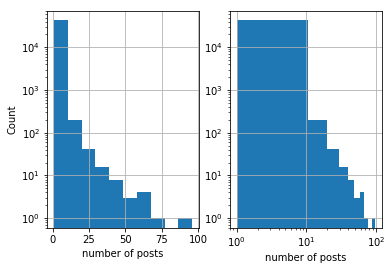

In [141]:
import matplotlib.pyplot as plt

print(data.author.value_counts()[:3])

fig, axes = plt.subplots(1, 2)
data.author.value_counts()[1:].hist(ax = axes[0])
axes[0].set_yscale('log')
axes[0].set_xlabel('number of posts')
axes[0].set_ylabel('Count')

data.author.value_counts()[1:].hist(ax = axes[1])
axes[1].set_yscale('log')
axes[1].set_xscale('log')
axes[1].set_xlabel('number of posts')


This is a power law, as expected.

In [112]:
dates = pd.to_datetime(data.created_utc, unit="s")
data.created = dates
dates.describe()

count                   90521
unique                  90453
top       2013-04-01 05:40:39
freq                        2
first     2009-01-01 01:23:22
last      2014-02-14 14:17:07
Name: created_utc, dtype: object

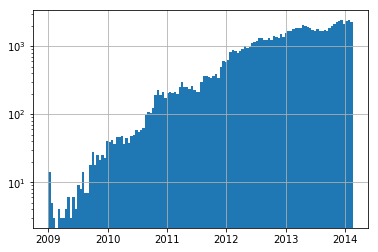

In [128]:
data.created.hist(bins=126)  # two bins per month
plt.yscale('log')

In [190]:
sum(data.created.dt.year<2011)/len(data)

0.027187061565824504

That is, only 3% of the posts are from 2009 or 2010.  Probably best to filter these out, since the community is still growing quickkly and might have very different characteristics than later on.

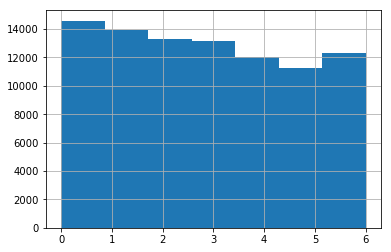

In [130]:
dates.dt.dayofweek.hist(bins=7)

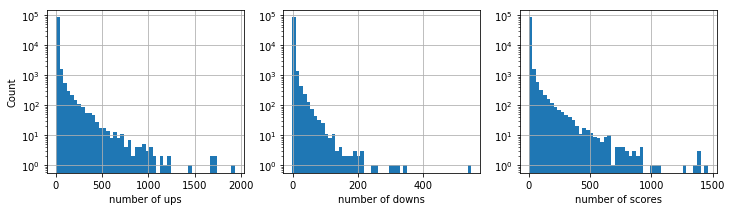

In [162]:
fig, axes = plt.subplots(1, 3, figsize=(12,3))

data.ups.hist(ax = axes[0], bins=50)
axes[0].set_yscale('log')
axes[0].set_xlabel('number of ups')
axes[0].set_ylabel('Count')
plt.yscale('log')

data.downs.hist(ax = axes[1], bins=50)
axes[1].set_yscale('log')
axes[1].set_xlabel('number of downs')
#axes[1].set_xlim([0, 2000])

data.score.hist(ax = axes[2], bins=50)
axes[2].set_yscale('log')
axes[2].set_xlabel('number of scores')


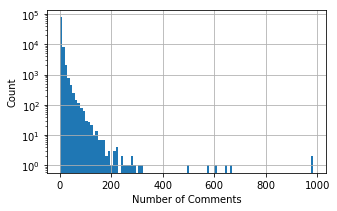

In [170]:
data.num_comments.hist(bins=100, figsize=(5,3))
plt.yscale('log')
plt.ylabel('Count')
plt.xlabel('Number of Comments')

In [176]:
print('Number of commentless posts = {}\nNumber of posts with 7+ comments = {}'.format(
    len(data[data.num_comments==0]), len(data[data.num_comments>=7])))

Number of commentless posts = 17364
Number of posts with 7+ comments = 19326


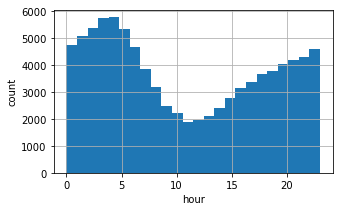

In [180]:
dates.dt.hour.hist(bins=24, figsize=(5,3))
plt.xlabel('hour')
plt.ylabel('count')

In [249]:
def PreProcessData(raw_data, extract_keys) :
    """ This processes the post data, and can be used as 
    a template for the upload data.
    """
    import pandas as pd
    
    data_raw = pd.DataFrame(raw_data)
    data = data_raw[sorted(extract_keys)].copy()
        
    data['created'] = pd.to_datetime(data.created_utc, unit="s")
    data['created_dayofweek'] = data.created.dt.dayofweek
    data['created_hour'] = data.created.dt.hour
    data['created_month'] = data.created.dt.month
    data['created_year'] = data.created.dt.year
    data = data[ data.created_year > 2010]
    
    return data

extract_keys = ['id', 'author', 'score', 'num_comments', 'downs', 'ups', 
                'created_utc', 'title', 'selftext']
data_clean = PreProcessData(results, extract_keys)
data_clean.describe()
data_clean.created.min()

Timestamp('2011-01-01 01:00:04')

AttributeError: module 'matplotlib.pyplot' has no attribute 'figsize'

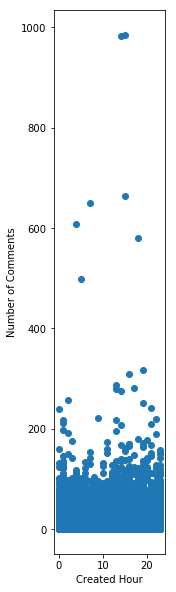

In [254]:
plt.scatter(data_clean.created_hour, data_clean.num_comments)
plt.xlabel('Created Hour')
plt.ylabel('Number of Comments')